In [29]:
import pandas as pd

# Load your data
df = pd.read_csv("SalaryMulti.csv")

# Preview the data
print(df.head())
print(df.info())
print(df.describe())

   Total Experience  Team Lead Experience  Project Manager Experience  \
0                 7                     2                           4   
1                 4                     0                           2   
2                13                     4                           8   
3                11                     3                           2   
4                 8                     1                           6   

   Certifications         Salary  
0               1   77318.070547  
1               3   64951.950980  
2               3  106058.185204  
3               1   89649.944851  
4               3   82206.019687  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Total Experience            1000 non-null   int64  
 1   Team Lead Experience        1000 non-null   int64  
 2   Project Manag

In [30]:
# Check for missing values
print(df.isnull().sum())

# Drop duplicates (if any)
df.drop_duplicates(inplace=True)

Total Experience              0
Team Lead Experience          0
Project Manager Experience    0
Certifications                0
Salary                        0
dtype: int64


In [31]:
X = df.drop("Salary", axis=1)  # Features
Y = df["Salary"]               # Target

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit only on training data, then transform both
# Fit StandardScaler only on the training data to avoid data leakage
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

lr = LinearRegression()
lr.fit(X_train_scaled, Y_train)

# Predictions
Y_pred = lr.predict(X_test_scaled)

# Evaluation
print("R² Score:", r2_score(Y_test, Y_pred))
print("MSE:", mean_squared_error(Y_test, Y_pred))
print("MAE:", mean_absolute_error(Y_test, Y_pred))

R² Score: 0.940614842359922
MSE: 20819427.9757656
MAE: 3733.830769337311


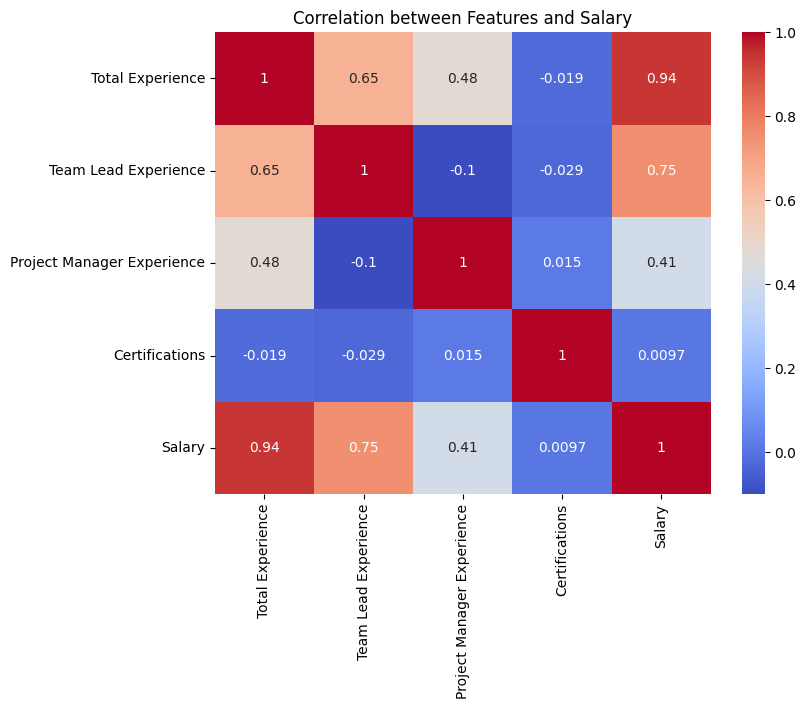

In [12]:
#1. Correlation Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Features and Salary')
plt.show()

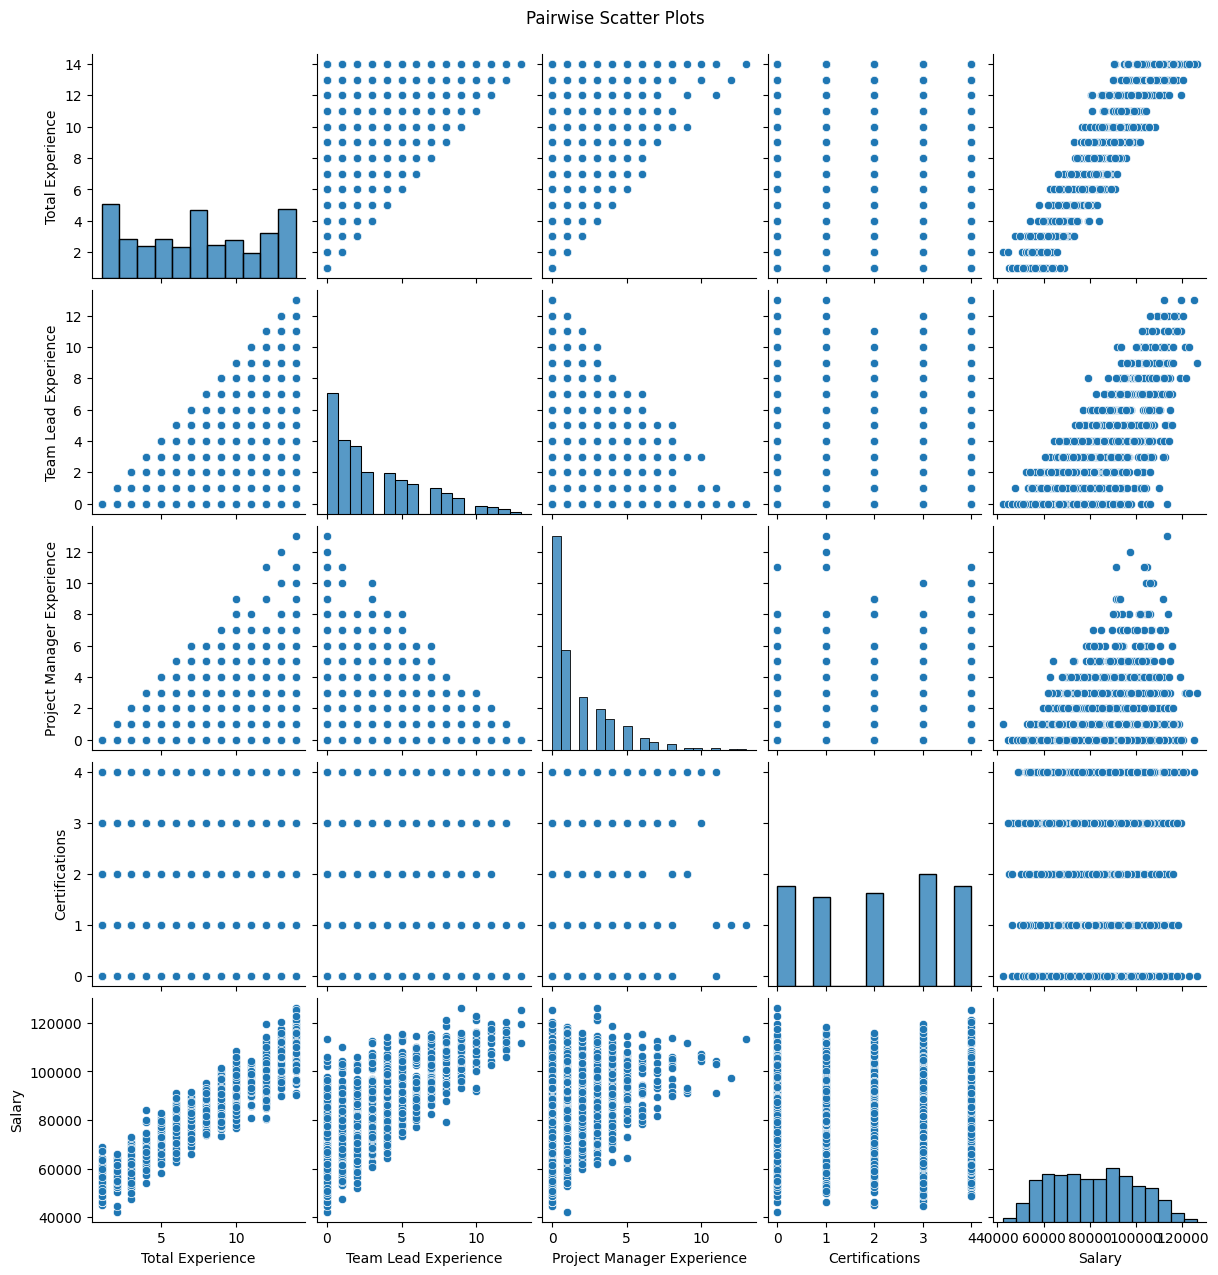

In [13]:
#2. Pairplot (Exploring Linear Relationships)
sns.pairplot(df)
plt.suptitle("Pairwise Scatter Plots", y=1.02)
plt.show()

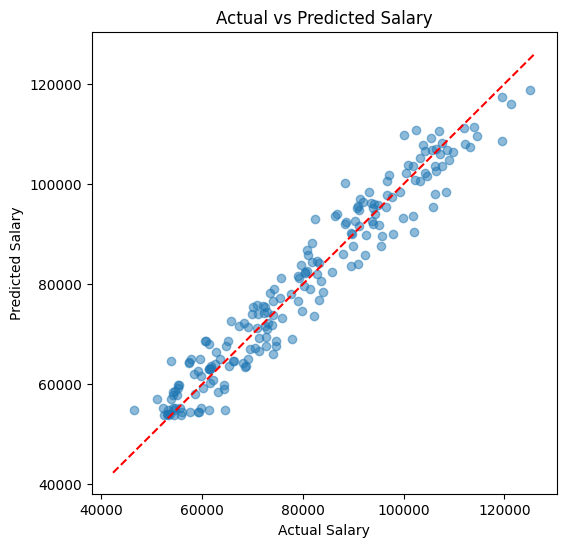

In [20]:
#3. Actual vs Predicted Salary Plot

import numpy as np

plt.figure(figsize=(6,6))
plt.scatter(Y_test, Y_pred, alpha=0.5)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()

In [28]:
#Testing Purpose
#fit_transform before splitting
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import pandas as pd

# Load your data
df = pd.read_csv("SalaryMulti.csv")

# Drop duplicates (if any)
df.drop_duplicates(inplace=True)

X = df.drop("Salary", axis=1)  # Features
Y = df["Salary"]               # Target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


lr = LinearRegression()
lr.fit(X_train_scaled, Y_train)

# Predictions
Y_pred = lr.predict(X_test_scaled)

# Evaluation
print("R² Score:", r2_score(Y_test, Y_pred))
print("MSE:", mean_squared_error(Y_test, Y_pred))
print("MAE:", mean_absolute_error(Y_test, Y_pred))

R² Score: 0.9276993819916757
MSE: 25347369.090955786
MAE: 4160.969290705492


This would mean letting the model “see” the test set before actually evaluating it. That's called data leakage — the model gets unfair access to future (unseen) data during training.

If include the test set while fitting, leaking future data into training, which gives unrealistically good results.

In [23]:
#Testing Purpose
#Polynomial Regression: degree=2
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Load your dataset
df = pd.read_csv("SalaryMulti.csv")

# Features and target
X = df.drop("Salary", axis=1)
y = df["Salary"]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Polynomial transformation (degree=2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Train polynomial regression model
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

# Predict
y_pred_poly = model_poly.predict(X_test_poly)

# Evaluation
r2_poly = r2_score(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)

print("Polynomial Regression (degree=2):")
print(f"R² Score: {r2_poly:.4f}")
print(f"MSE: {mse_poly:.2f}")

Polynomial Regression (degree=2):
R² Score: 0.9389
MSE: 21403680.24


The following plot compares the actual salaries in the dataset with the predicted salaries from the polynomial regression model (degree=2). The predictions closely follow the diagonal reference line, indicating good model performance. However, the improvement over a simple linear regression model was minimal, suggesting that a more complex model is unnecessary for this dataset.

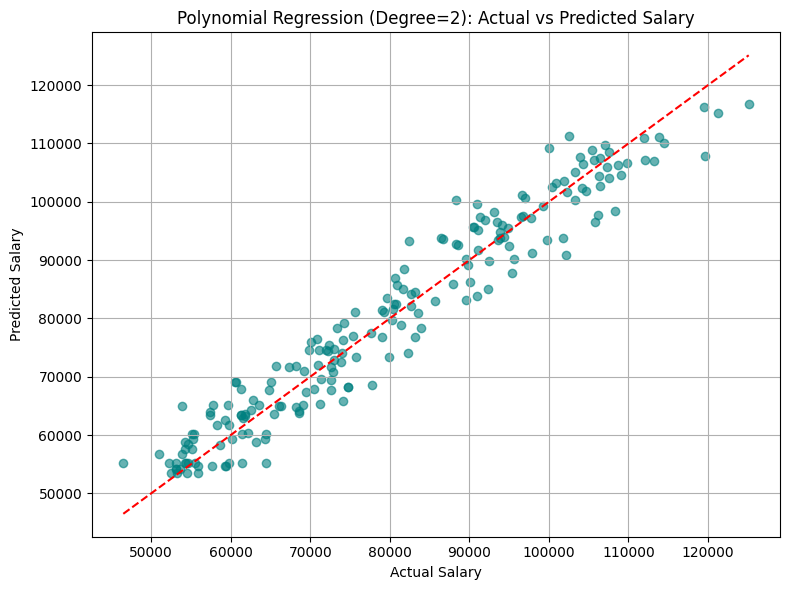

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_poly, color='teal', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Polynomial Regression (Degree=2): Actual vs Predicted Salary")
plt.grid(True)
plt.tight_layout()
plt.show()